In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [2]:
data = pd.read_csv("3w.csv")

Features and Target variables

In [3]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# FOR LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','2W','3W']].values
target = data['SD'].values

Normalize data

In [4]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.16, random_state=42)

Reshape the input data for all models

In [6]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [7]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)


Epoch 1/300

19/19 [==============================] - 3s 27ms/step - loss: 255.8820 - val_loss: 251.9499
Epoch 2/300
19/19 [==============================] - 0s 7ms/step - loss: 246.3043 - val_loss: 226.1775
Epoch 3/300
19/19 [==============================] - 0s 7ms/step - loss: 127.9011 - val_loss: 68.4891
Epoch 4/300
19/19 [==============================] - 0s 7ms/step - loss: 31.8449 - val_loss: 46.0965
Epoch 5/300
19/19 [==============================] - 0s 7ms/step - loss: 30.0388 - val_loss: 45.5201
Epoch 6/300
19/19 [==============================] - 0s 6ms/step - loss: 30.5625 - val_loss: 45.1922
Epoch 7/300
19/19 [==============================] - 0s 11ms/step - loss: 30.2980 - val_loss: 45.1090
Epoch 8/300
19/19 [==============================] - 0s 6ms/step - loss: 29.5323 - val_loss: 46.1983
Epoch 9/300
19/19 [==============================] - 0s 7ms/step - loss: 28.7171 - val_loss: 46.3531
Epoch 10/300
19/19 [==============================] - 0s 7ms/step - loss: 31.7154 

Visualize LSTM results

0.4777244787966096


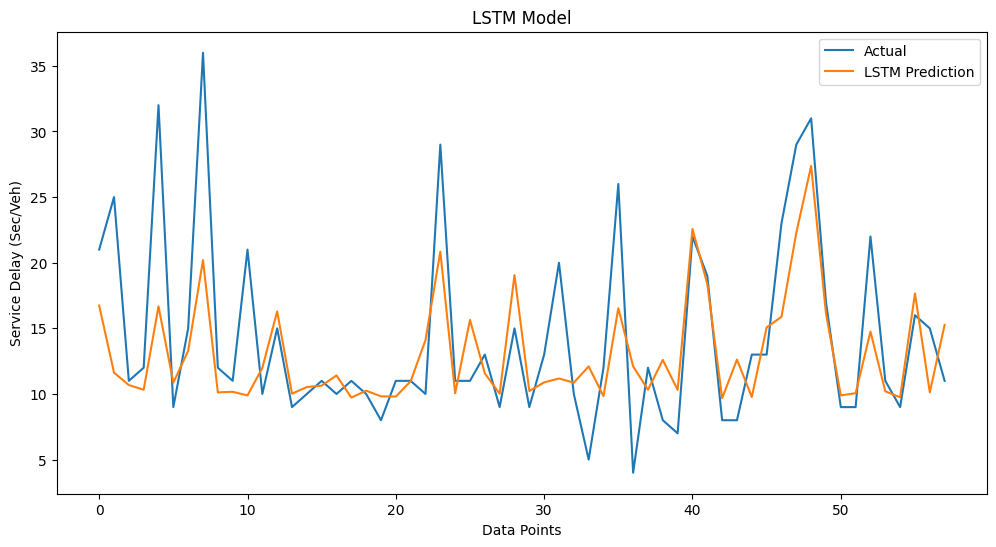

In [8]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [9]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/300
19/19 [==============================] - 4s 28ms/step - loss: 251.8435 - val_loss: 239.2906
Epoch 2/300
19/19 [==============================] - 0s 6ms/step - loss: 169.7800 - val_loss: 45.7912
Epoch 3/300
19/19 [==============================] - 0s 6ms/step - loss: 39.1414 - val_loss: 30.0757
Epoch 4/300
19/19 [==============================] - 0s 6ms/step - loss: 25.5786 - val_loss: 25.8749
Epoch 5/300
19/19 [==============================] - 0s 6ms/step - loss: 22.9533 - val_loss: 26.3416
Epoch 6/300
19/19 [==============================] - 0s 8ms/step - loss: 22.2172 - val_loss: 26.5621
Epoch 7/300
19/19 [==============================] - 0s 6ms/step - loss: 22.6049 - val_loss: 26.0487
Epoch 8/300
19/19 [==============================] - 0s 6ms/step - loss: 22.3773 - val_loss: 26.3682
Epoch 9/300
19/19 [==============================] - 0s 5ms/step - loss: 23.0222 - val_loss: 28.7347
Epoch 10/300
19/19 [==============================] - 0s 6ms/step - loss: 24.1628 - val

Visualize BiLSTM results

0.5130380136166529


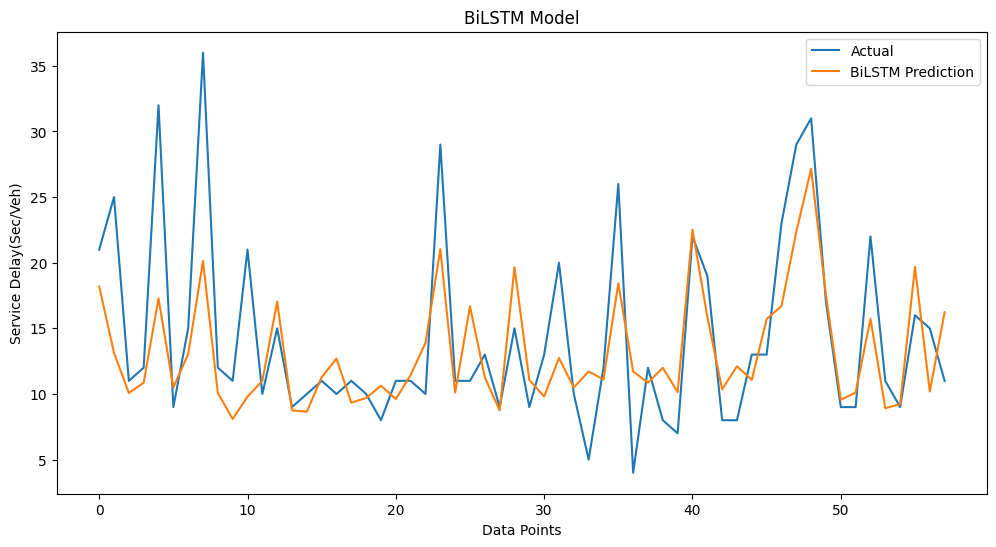

In [10]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [11]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
19/19 [==============================] - 3s 29ms/step - loss: 252.7823 - val_loss: 243.1854
Epoch 2/800
19/19 [==============================] - 0s 7ms/step - loss: 221.5745 - val_loss: 166.3475
Epoch 3/800
19/19 [==============================] - 0s 9ms/step - loss: 76.7034 - val_loss: 40.7179
Epoch 4/800
19/19 [==============================] - 0s 5ms/step - loss: 32.5252 - val_loss: 42.2231
Epoch 5/800
19/19 [==============================] - 0s 5ms/step - loss: 29.3304 - val_loss: 40.2176
Epoch 6/800
19/19 [==============================] - 0s 6ms/step - loss: 29.2359 - val_loss: 39.9300
Epoch 7/800
19/19 [==============================] - 0s 5ms/step - loss: 28.2156 - val_loss: 40.5101
Epoch 8/800
19/19 [==============================] - 0s 5ms/step - loss: 27.7612 - val_loss: 39.3972
Epoch 9/800
19/19 [==============================] - 0s 5ms/step - loss: 27.0224 - val_loss: 39.2597
Epoch 10/800
19/19 [==============================] - 0s 5ms/step - loss: 27.0430 - va

Visualize GRU results

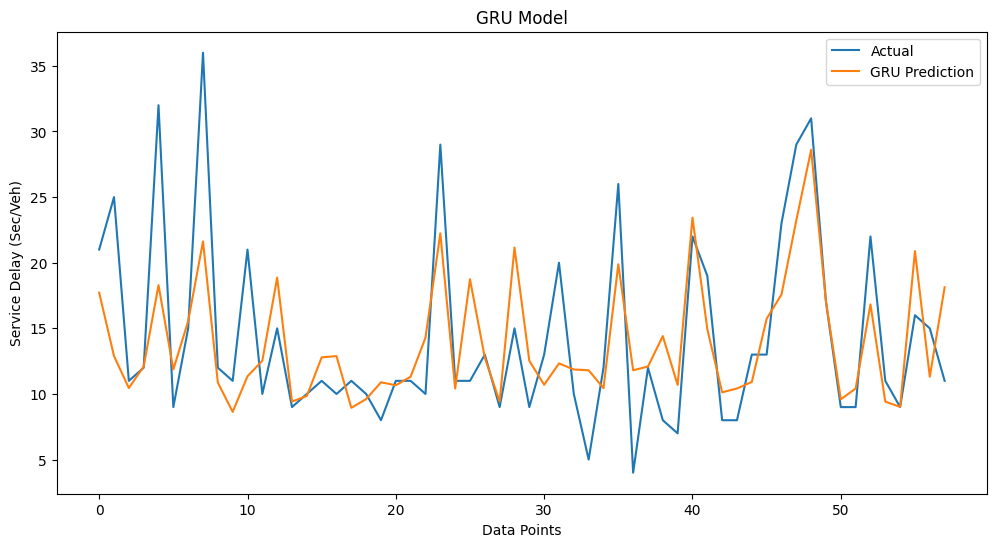

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [13]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=300, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/300
19/19 [==============================] - 5s 37ms/step - loss: 244.9290 - val_loss: 220.8156
Epoch 2/300
19/19 [==============================] - 0s 8ms/step - loss: 139.0983 - val_loss: 62.7924
Epoch 3/300
19/19 [==============================] - 0s 8ms/step - loss: 32.9631 - val_loss: 30.8201
Epoch 4/300
19/19 [==============================] - 0s 9ms/step - loss: 25.7729 - val_loss: 29.0707
Epoch 5/300
19/19 [==============================] - 0s 11ms/step - loss: 24.7645 - val_loss: 27.5362
Epoch 6/300
19/19 [==============================] - 0s 8ms/step - loss: 23.6517 - val_loss: 27.4952
Epoch 7/300
19/19 [==============================] - 0s 5ms/step - loss: 26.0243 - val_loss: 27.0180
Epoch 8/300
19/19 [==============================] - 0s 6ms/step - loss: 22.6552 - val_loss: 29.8676
Epoch 9/300
19/19 [==============================] - 0s 7ms/step - loss: 24.7231 - val_loss: 33.1057
Epoch 10/300
19/19 [==============================] - 0s 9ms/step - loss: 27.7551 - va

Visualize BiGRU results

0.5589357574400715


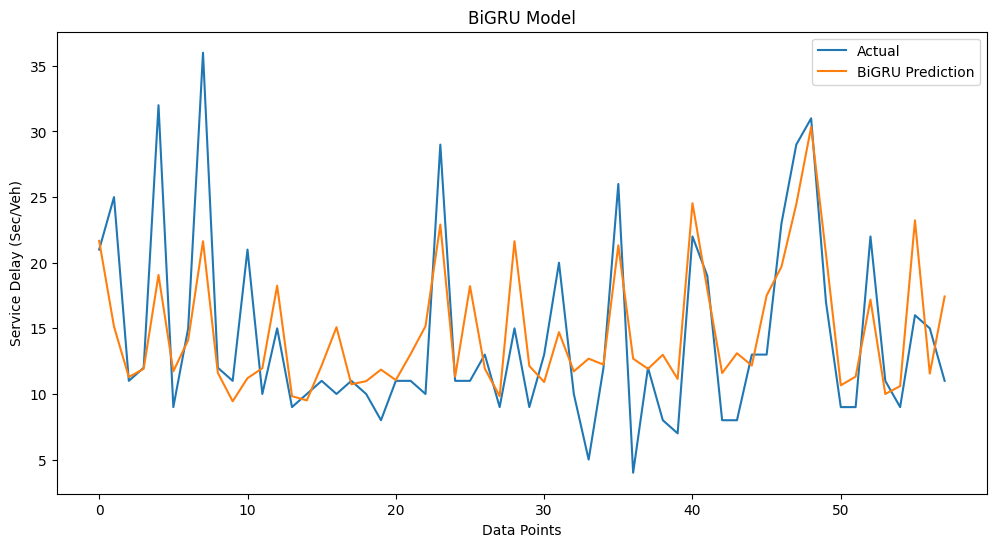

In [14]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [15]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)


Epoch 1/800
19/19 [==============================] - 1s 8ms/step - loss: 240.3382 - val_loss: 214.3363
Epoch 2/800
19/19 [==============================] - 0s 3ms/step - loss: 177.2581 - val_loss: 126.8839
Epoch 3/800
19/19 [==============================] - 0s 3ms/step - loss: 81.2925 - val_loss: 38.7768
Epoch 4/800
19/19 [==============================] - 0s 4ms/step - loss: 29.8197 - val_loss: 31.7063
Epoch 5/800
19/19 [==============================] - 0s 3ms/step - loss: 27.3890 - val_loss: 29.6629
Epoch 6/800
19/19 [==============================] - 0s 3ms/step - loss: 26.3466 - val_loss: 29.2832
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 26.0625 - val_loss: 29.0086
Epoch 8/800
19/19 [==============================] - 0s 3ms/step - loss: 25.8437 - val_loss: 28.6744
Epoch 9/800
19/19 [==============================] - 0s 3ms/step - loss: 25.5156 - val_loss: 28.4793
Epoch 10/800
19/19 [==============================] - 0s 3ms/step - loss: 25.4188 - va

Visualize CNN results

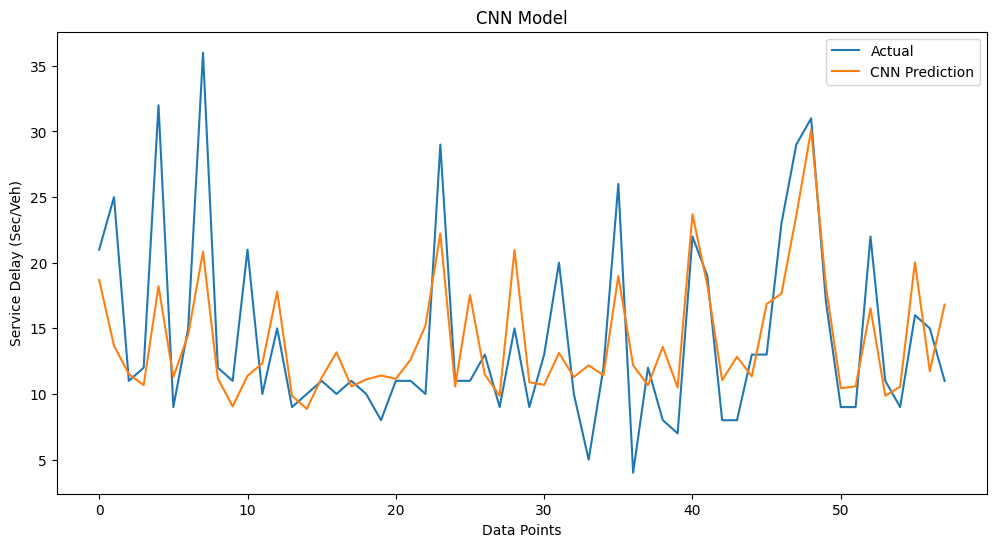

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [17]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
19/19 [==============================] - 1s 11ms/step - loss: 251.8569 - val_loss: 243.2475
Epoch 2/800
19/19 [==============================] - 0s 4ms/step - loss: 225.6856 - val_loss: 185.4947
Epoch 3/800
19/19 [==============================] - 0s 3ms/step - loss: 85.8961 - val_loss: 53.0605
Epoch 4/800
19/19 [==============================] - 0s 4ms/step - loss: 31.7202 - val_loss: 36.4626
Epoch 5/800
19/19 [==============================] - 0s 3ms/step - loss: 25.6247 - val_loss: 34.7966
Epoch 6/800
19/19 [==============================] - 0s 3ms/step - loss: 25.1298 - val_loss: 34.4629
Epoch 7/800
19/19 [==============================] - 0s 4ms/step - loss: 24.8923 - val_loss: 33.4165
Epoch 8/800
19/19 [==============================] - 0s 3ms/step - loss: 24.2874 - val_loss: 32.9033
Epoch 9/800
19/19 [==============================] - 0s 3ms/step - loss: 24.4196 - val_loss: 33.4926
Epoch 10/800
19/19 [==============================] - 0s 4ms/step - loss: 24.2908 - va

Visualize CNN_LSTM results

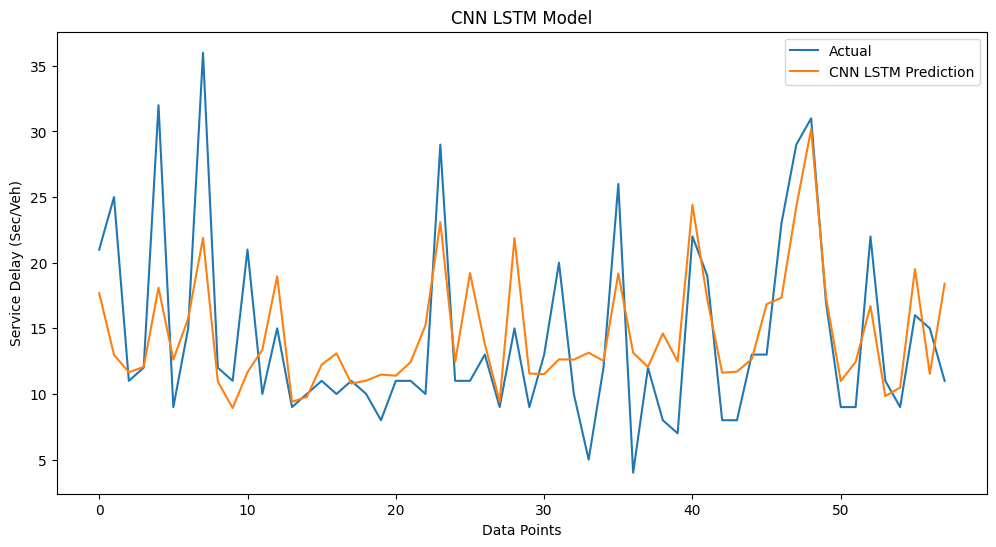

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [19]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
19/19 [==============================] - 2s 14ms/step - loss: 250.2030 - val_loss: 238.6883
Epoch 2/800
19/19 [==============================] - 0s 4ms/step - loss: 207.9304 - val_loss: 148.2180
Epoch 3/800
19/19 [==============================] - 0s 4ms/step - loss: 61.2125 - val_loss: 25.8715
Epoch 4/800
19/19 [==============================] - 0s 4ms/step - loss: 31.8333 - val_loss: 26.0134
Epoch 5/800
19/19 [==============================] - 0s 4ms/step - loss: 25.4796 - val_loss: 28.2536
Epoch 6/800
19/19 [==============================] - 0s 4ms/step - loss: 23.9943 - val_loss: 26.0961
Epoch 7/800
19/19 [==============================] - 0s 3ms/step - loss: 23.3624 - val_loss: 27.8927
Epoch 8/800
19/19 [==============================] - 0s 4ms/step - loss: 24.6592 - val_loss: 28.4815
Epoch 9/800
19/19 [==============================] - 0s 4ms/step - loss: 23.6886 - val_loss: 26.6429
Epoch 10/800
19/19 [==============================] - 0s 4ms/step - loss: 23.9781 - va

Visualize CNN_BiLSTM results

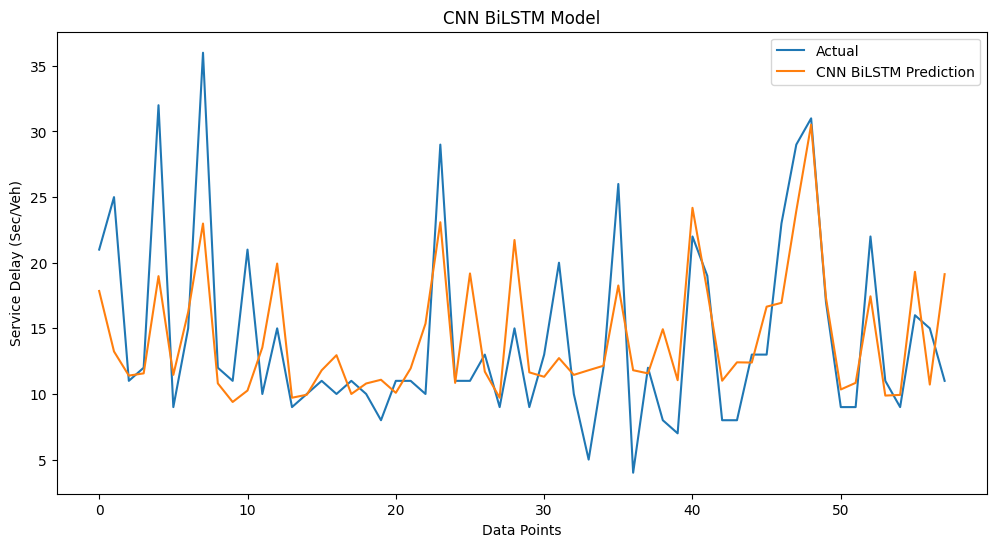

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [21]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

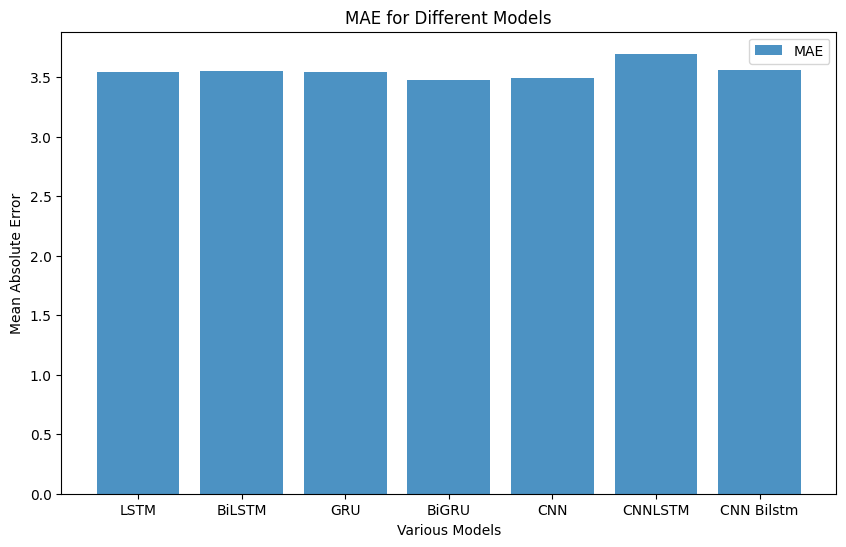

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

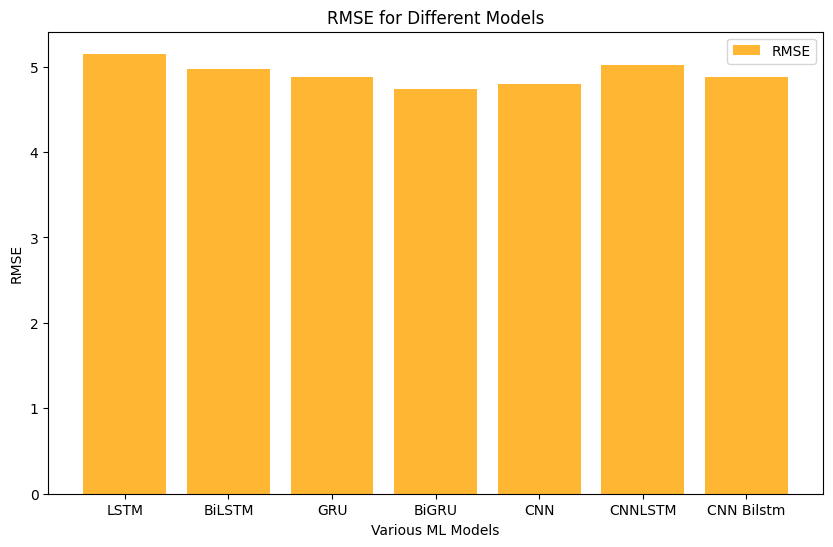

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

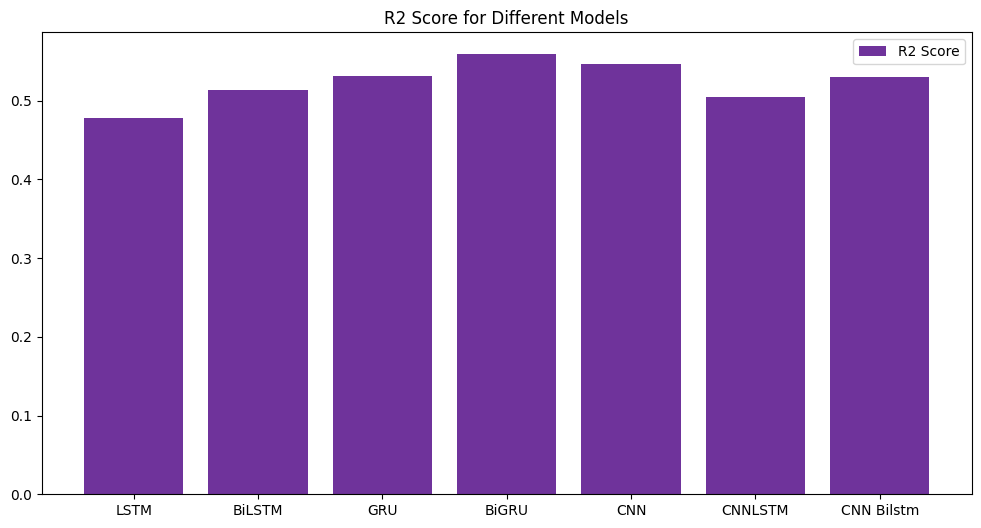

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [25]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.5480828614070496
LSTM MSE: 5.150895133914643
LSTM R2 Score: 0.4777244787966096

BiLSTM MAE: 3.553801109050882
BiLSTM MSE: 4.973709351554478
BiLSTM R2 Score: 0.5130380136166529

GRU MAE: 3.5409751924975166
GRU MSE: 4.879026739927252
GRU R2 Score: 0.531401761996441

BiGRU MAE: 3.4808421792655158
BiGRU MSE: 4.733515439128794
BiGRU R2 Score: 0.5589357574400715

CNN MAE: 3.4960732460021973
CNN MSE: 4.801853677385094
CNN R2 Score: 0.5461084488562814

CNN LSTM MAE: 3.6981614211509966
CNN LSTM MSE: 5.018631907143099
CNN LSTM R2 Score: 0.5042018048706547

CNN BiLSTM MAE: 3.5611736692231277
CNN BiLSTM MSE: 4.883498392319413
CNN BiLSTM R2 Score: 0.530542423128332


In [26]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.5480828614070496
LSTM MSE: 5.150895133914643
LSTM R2 Score: 0.4777244787966096

BiLSTM MAE: 3.553801109050882
BiLSTM MSE: 4.973709351554478
BiLSTM R2 Score: 0.5130380136166529

GRU MAE: 3.5409751924975166
GRU MSE: 4.879026739927252
GRU R2 Score: 0.531401761996441

BiGRU MAE: 3.4808421792655158
BiGRU MSE: 4.733515439128794
BiGRU R2 Score: 0.5589357574400715

CNN MAE: 3.4960732460021973
CNN MSE: 4.801853677385094
CNN R2 Score: 0.5461084488562814

CNN LSTM MAE: 3.6981614211509966
CNN LSTM MSE: 5.018631907143099
CNN LSTM R2 Score: 0.5042018048706547

CNN BiLSTM MAE: 3.5611736692231277
CNN BiLSTM MSE: 4.883498392319413
CNN BiLSTM R2 Score: 0.530542423128332


Plot predictions for each model

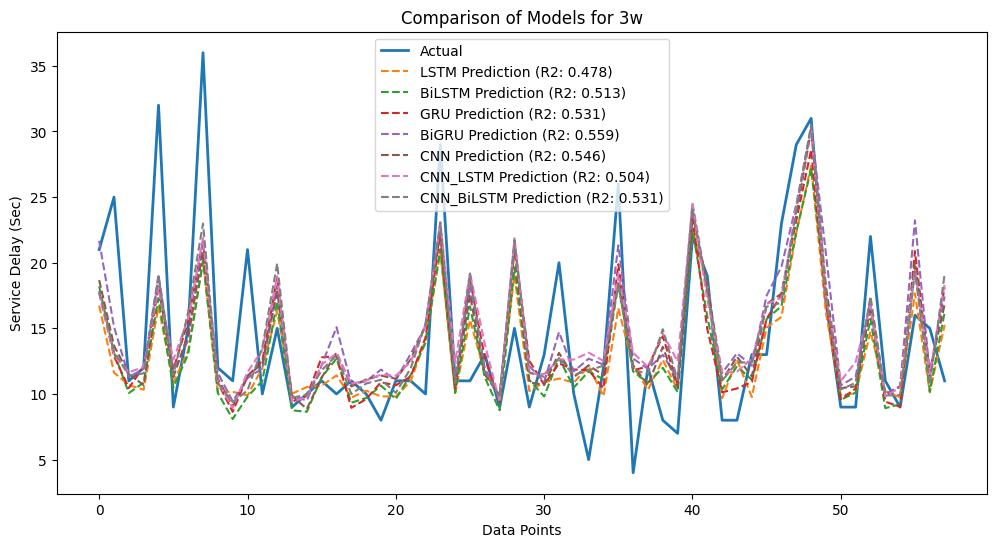

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 3w')
plt.show()

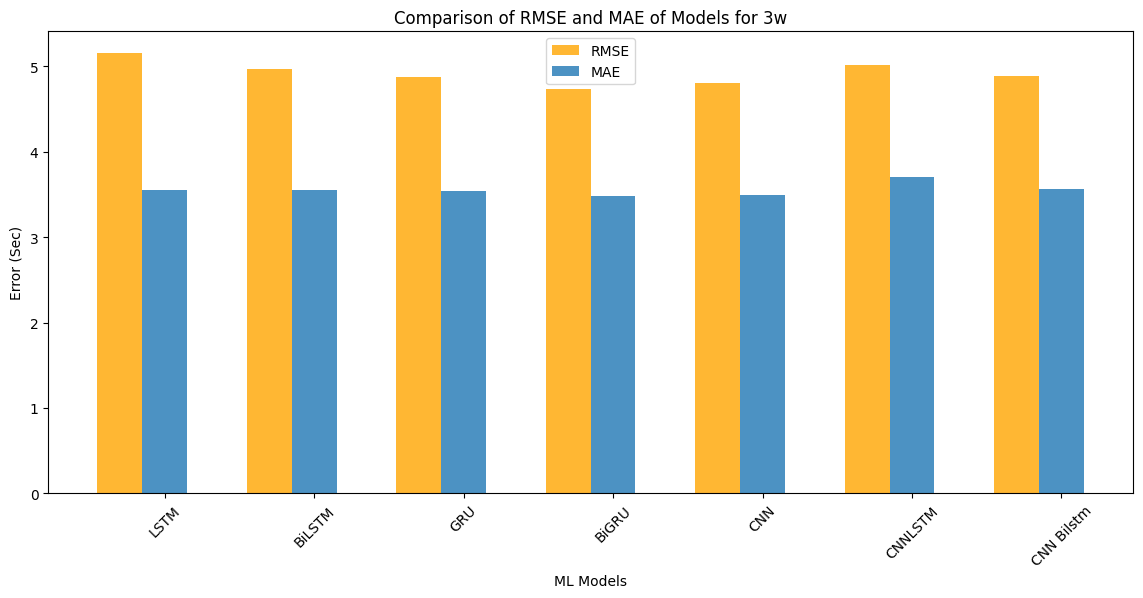

In [28]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 3w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()